In [23]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore") # отключает предупреждения

In [4]:
df = pd.read_excel('ter11.xlsx', sheet_name='Лист1')

Пример для territ_subdiv_1 = 1 и territ_subdiv_2 = 1

In [6]:
df.set_index('report_dt', inplace=True)

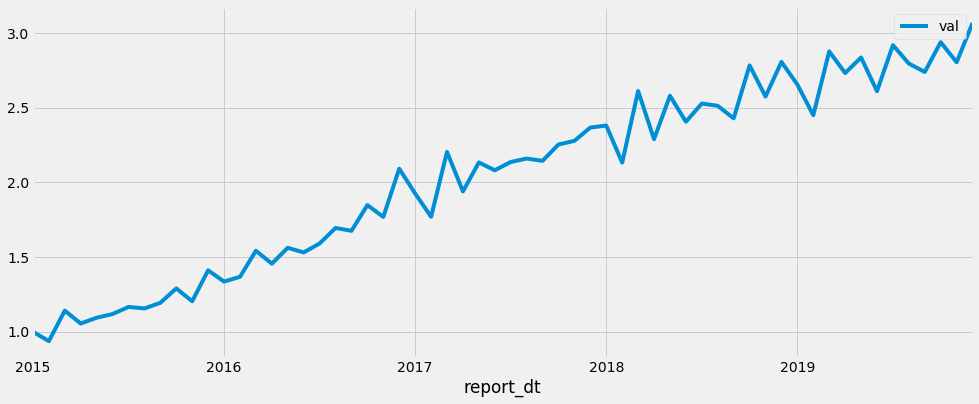

In [7]:
df.plot(figsize=(15, 6))
plt.show()

In [54]:
def check_stationary(dataset):
    check = sm.tsa.adfuller(dataset)
    print(f'adf: {check[0]}')
    print(f'p-value: {check[1]}')
    print(f'Critical values: {check[4]}')
    if check[0]> check[4]['5%']: 
        print('есть единичные корни, ряд не стационарен')
    else:
        print('единичных корней нет, ряд стационарен')

In [55]:
check_stationary(df)

adf: -2.5585526823260825
p-value: 0.10186967663251018
Critical values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
есть единичные корни, ряд не стационарен


In [51]:
# Определим p, d и q в диапазоне 0-2
p = d = q = range(0, 2)
# Сгенерируем различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируем комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [56]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:259.22159866435646
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:179.83578276558276
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:55.683573779952745
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1511.0801110857506
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:-10.29647511384001
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:-13.81058380782683
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:-33.10056847540489
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1306.762643134379
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:188.60353664063683
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:124.8771298649746
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:18.060626671009576
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1518.4787313563204
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:-27.986962583872156
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:-24.4728374808723
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:-31.269214272377553
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1505.26554897889
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:-27.86046701176518
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:-34.90480784239879
ARIMA(0, 1, 0)x(0, 1, 0, 12) - 

In [10]:
mod = sm.tsa.statespace.SARIMAX(df,
order=(1, 1, 1),
seasonal_order=(1, 0, 0, 12),
enforce_stationarity=False,
enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4780      0.189     -2.527      0.011      -0.849      -0.107
ma.L1         -0.4894      0.130     -3.772      0.000      -0.744      -0.235
ar.S.L12       0.8972      0.077     11.610      0.000       0.746       1.049
sigma2         0.0064      0.001      4.591      0.000       0.004       0.009


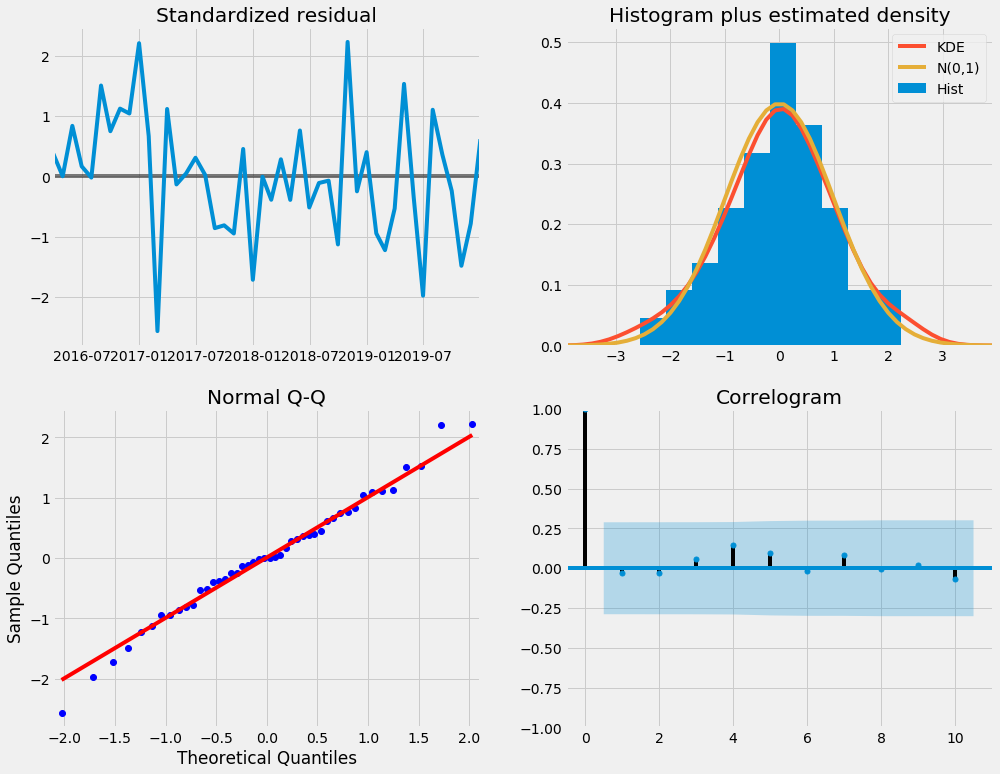

In [11]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Верхний левый график - остатки с течением времени не показывают явной сезонности. График автокорреляции (внизу справа) показывает, что остатки временных рядов имеют низкую корреляцию с запаздывающими данными.

Нижний левый график - график q-q показывает, что упорядоченное распределение остатков (синие точки) следует линейному тренду выборок, взятых из стандартного распределения N (0, 1). Опять же, это признак того, что остатки нормально распределены.

Верхний правый график - красная линия KDE находится близко к линии N (0,1) (где N (0,1) - нормальное распределение со средним 0 и стандартным отклонением 1). 
Это хороший признак того, что остатки нормально распределены.

In [12]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-31'), dynamic=False)
pred_ci = pred.conf_int()

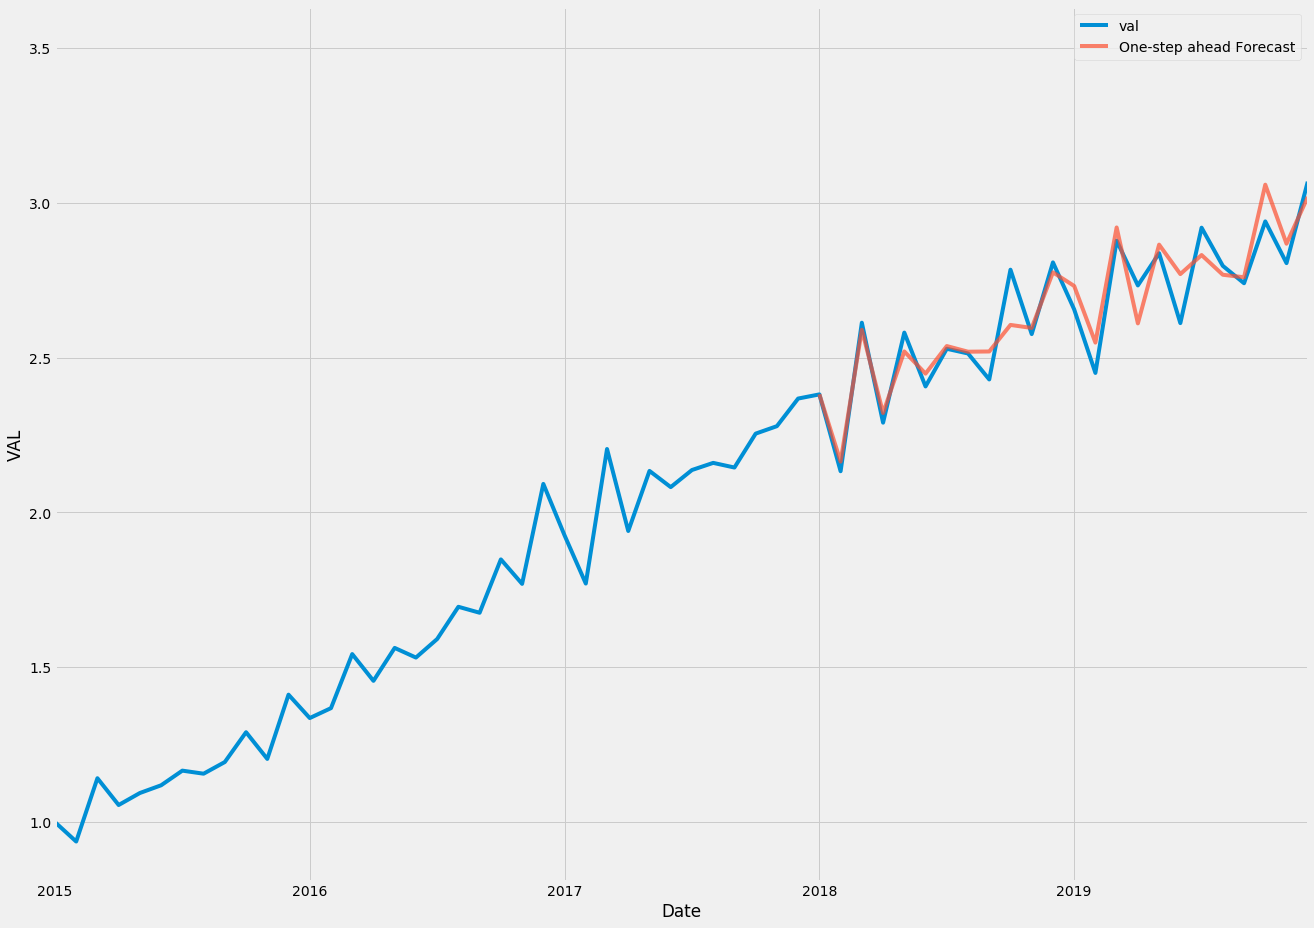

In [31]:
ax = df['2015':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('VAL')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = df['1998-01-01':].squeeze() # Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [32]:
# Получить прогноз на 12 шагов вперёд
pred_uc = results.get_forecast(steps=12)
# Получить интервал прогноза
pred_ci = pred_uc.conf_int()

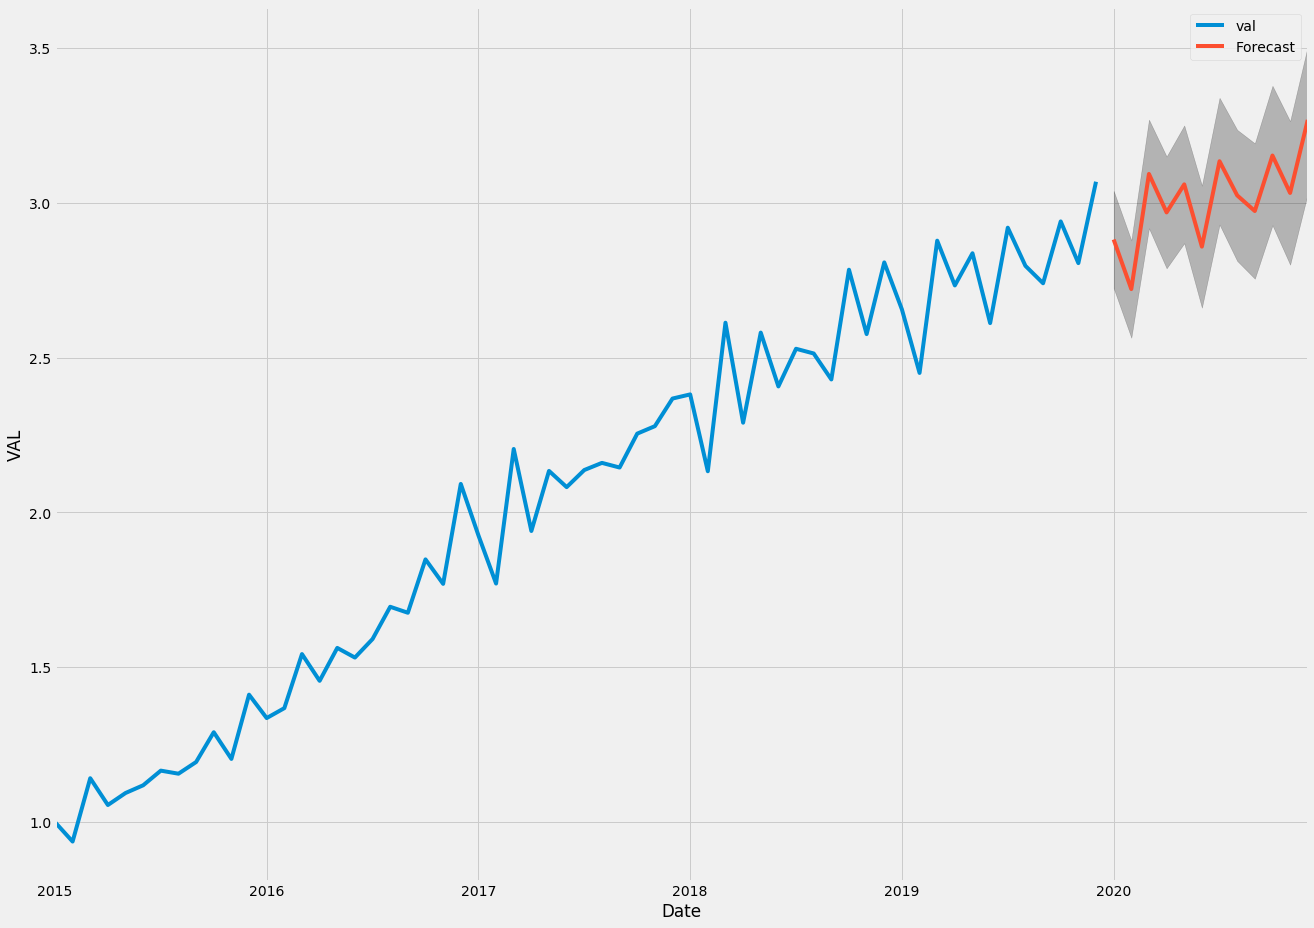

In [33]:
ax = df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('VAL')
plt.legend()
plt.show()

In [36]:
pred1_1 = pred_uc.predicted_mean.to_frame(name='val')
print(pred1_1)

                 val
2020-01-31  2.881706
2020-02-29  2.721661
2020-03-31  3.093503
2020-04-30  2.969288
2020-05-31  3.059863
2020-06-30  2.858678
2020-07-31  3.134610
2020-08-31  3.024296
2020-09-30  2.973737
2020-10-31  3.152998
2020-11-30  3.032120
2020-12-31  3.268017
